In [1]:
import ptwt, pywt, torch
import numpy as np
import scipy.misc


In [2]:
face = np.transpose(scipy.misc.face(),[2, 0, 1]).astype(np.float64)
pytorch_face = torch.tensor(face)
coefficients = ptwt.wavedec2(pytorch_face, pywt.Wavelet("haar"),
                                level=2, mode="constant")
reconstruction = ptwt.waverec2(coefficients, pywt.Wavelet("haar"))
np.max(np.abs(face - reconstruction.squeeze(1).numpy()))

2.5579538487363607e-13

In [3]:
import matplotlib.pyplot as plt

In [11]:
def show_pytorch_img(tensor):
    plt.imshow(torch.permute(tensor, (1,2,0)) / 255.)

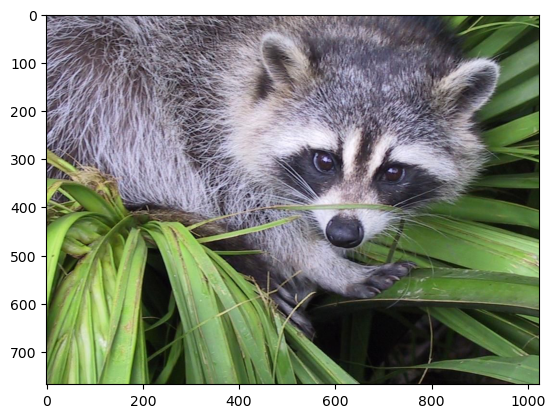

In [12]:
show_pytorch_img(pytorch_face)

In [20]:
pytorch_face.size()

torch.Size([3, 768, 1024])

In [15]:
len(coefficients)

3

In [29]:
for i, x in enumerate(coefficients):
    if i == 0:
        tmp = x.numpy()
        print(f"Index {i}", x.size(), f'min {tmp.min()}', f'max {tmp.max()}', sep="\t")
    else:
        print(f"Tuple {i}:")
        for j, tuple_element in enumerate(x):
            tmp = tuple_element.numpy()
            print(f"\t{j}", tuple_element.size(), f'min {tmp.min()}', f'max {tmp.max()}', sep="\t")

Index 0	torch.Size([3, 1, 192, 256])	min 5.250000000000003	max 1019.7500000000003
Tuple 1:
	0	torch.Size([3, 1, 192, 256])	min -232.00000000000009	max 293.50000000000017
	1	torch.Size([3, 1, 192, 256])	min -209.00000000000006	max 204.75000000000009
	2	torch.Size([3, 1, 192, 256])	min -147.75000000000006	max 155.50000000000003
Tuple 2:
	0	torch.Size([3, 1, 384, 512])	min -109.50000000000003	max 106.00000000000003
	1	torch.Size([3, 1, 384, 512])	min -82.00000000000001	max 85.00000000000003
	2	torch.Size([3, 1, 384, 512])	min -54.500000000000014	max 39.500000000000014


In [32]:
def show_wavelet_coef(coef):
    coef = torch.permute(coef, (1, 2, 3, 0))
    data = coef.numpy()
    normalizedData = (data-np.min(data))/(np.max(data)-np.min(data))
    plt.imshow(normalizedData[0])

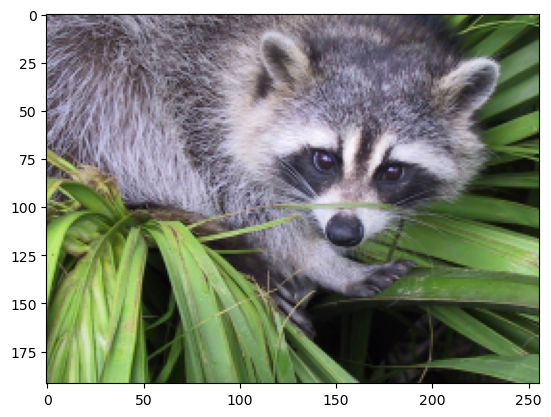

In [33]:
show_wavelet_coef(coefficients[0])

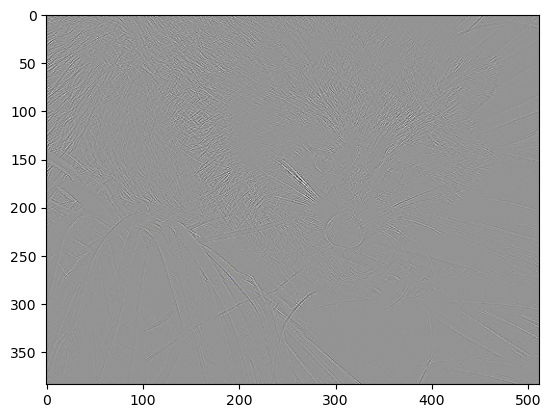

In [36]:
for i, x in enumerate(coefficients):
    if i == 0:
        show_wavelet_coef(x)
    else:
        for j, tuple_element in enumerate(x):
            show_wavelet_coef(tuple_element)

In [37]:

test_coeff = ptwt.wavedec2(pytorch_face, pywt.Wavelet("haar"),level=1, mode="constant")

In [38]:
len(test_coeff)

2

In [39]:
for i, x in enumerate(test_coeff):
    if i == 0:
        tmp = x.numpy()
        print(f"Index {i}", x.size(), f'min {tmp.min()}', f'max {tmp.max()}', sep="\t")
    else:
        print(f"Tuple {i}:")
        for j, tuple_element in enumerate(x):
            tmp = tuple_element.numpy()
            print(f"\t{j}", tuple_element.size(), f'min {tmp.min()}', f'max {tmp.max()}', sep="\t")

Index 0	torch.Size([3, 1, 384, 512])	min 0.0	max 510.00000000000006
Tuple 1:
	0	torch.Size([3, 1, 384, 512])	min -109.50000000000003	max 106.00000000000003
	1	torch.Size([3, 1, 384, 512])	min -82.00000000000001	max 85.00000000000003
	2	torch.Size([3, 1, 384, 512])	min -54.500000000000014	max 39.500000000000014


In [40]:

test_reconst = ptwt.waverec2(test_coeff, pywt.Wavelet("haar"))

In [43]:
test_reconst.size()

torch.Size([3, 1, 768, 1024])

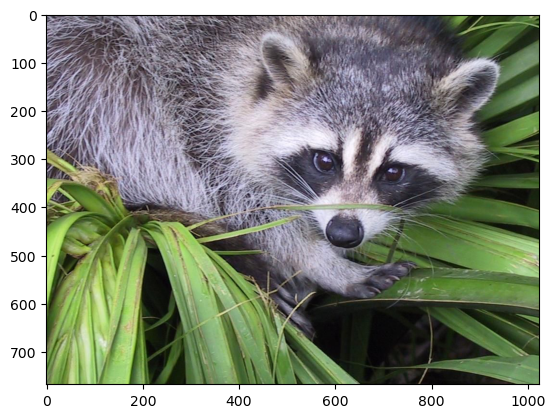

In [44]:
show_wavelet_coef(test_reconst)

In [45]:
import torchvision

In [46]:
tsr_img = torchvision.io.read_image('data/celeba/img_align_celeba/000001.jpg')
tsr_img.shape

torch.Size([3, 218, 178])

In [47]:
pytorch_face.shape

torch.Size([3, 768, 1024])

In [48]:
img_0 = torchvision.io.read_image('data/celeba/img_align_celeba/000001.jpg')
img_1 = torchvision.io.read_image('data/celeba/img_align_celeba/000002.jpg')
imgs = [img_0, img_1]

In [51]:
img_0.shape

torch.Size([3, 218, 178])

In [52]:
img_1.shape

torch.Size([3, 218, 178])

In [53]:
imgs_coeff = ptwt.wavedec2(imgs, pywt.Wavelet("haar"),level=1, mode="constant")

AttributeError: 'list' object has no attribute 'dim'